(simple_integrator)=
# Integrate a mean profile wrt to time using scipy.integrate

In [1]:
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot as plt

from Bretherton UW547

In [2]:
def dthdt(theta, t, zf, zh, l, Fth0):
    """
     theta tendency for ODE solver used to calculate deepening of surf-heated BL.
     Arguments   Size   Units  Description
       t          1       s    time
       theta     nz     K    at half-levels zh (here nz is length of zh)
     Parameters
       zf      (nz+1)   m    height of flux levels
       zh          nz   m    height of half (thermo) levels
       l       (nz-1)   m    Blackadar lengthscale at heights z(2)-z(nz)
       Fth0         1   K m/s  Constant surface theta flux
     Output
       tend        nz   m    tendency d(theta)/dt at the half-levels
       K       (nz-1)   m2/s  eddy diffusivity at interior flux levels
       Fth     (nz+1)   K m/s  theta flux at flux levels
    """
    Fth=np.empty_like(zf)
    g = 9.8
    thetaref = np.mean(theta)
    dthdz = np.diff(theta)/np.diff(zh)

#  We use the convective limit (Ri -> inf) of eddy diffusivity formula
#   K = l^2*|du/dz|*sqrt(1-16Ri) ~ l^2*sqrt(-16*db/dz) (unstable)
#  We take K=0 for stable stratification.

    dbdz = (g/thetaref)*dthdz
    dbdz[dbdz>0] = 0
    K = l**2.*np.sqrt(-16*dbdz)
    Fth[1:-1] = -K*dthdz
    Fth[0] = Fth0
    Fth[-1] = 0
    tend = -np.diff(Fth)/np.diff(zf)
#    pdb.set_trace()
    return tend

Script for AS547 HW3 prob. 2, which is a 1st order closure model with no
shear.

 Input parameters and theta profile (thetai):
 Use evenly spaced flux levels from 0-ztop m with spacing dz, with 
 initial theta given at half-levels zh. the_lambda is the asymptotic Blackadar 
 lengthscale, and Hs0 is the surface sensible heat flux (W/m2)

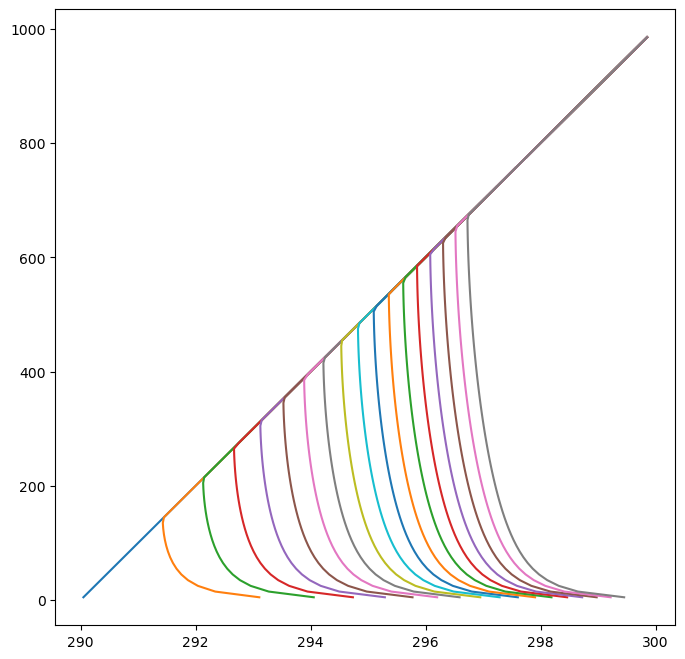

In [3]:
 tf = 3*3600
 dtout = 600
 dz = 10.
 ztop = 1000.
 the_lambda = 100.
 Hs0 = 300.
 zh = np.arange(dz/2,(ztop-dz/2),dz)
 thetai = 290 + 0.01*zh

 tspan = np.arange(0.,tf,dtout)
 zf = np.arange(0.,ztop,dz)
 nz = len(zh)

 rhoref = 1.2
 Cp = 1004.
 Fth0 = Hs0/(rhoref*Cp)

#  Specify Blackadar master lengthscale for interior flux points for use in
#  ODE solver.

 k = 0.4
 l = the_lambda/(1 + the_lambda/(k*zf[1:-1]))

 the_prof=integrate.odeint(dthdt, thetai, tspan,(zf, zh, l, Fth0))
 import pdb
 fig,ax = plt.subplots(1,1,figsize=(8,8))
 for item in the_prof:
     ax.plot(item,zh)
 plt.show()

## Questions

1) How would other K parameterzations changes these results
2) How sensitive i the result to the choice of $\lambda$ = 100 m?
3) Does the inversion height increase as $\sqrt{\text{time}}$?